In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
fuel_csv = Path("Resources/Fuel pricing/Dist Fuel Pricing 2019-2023.csv")
fuel_data = pd.read_csv(fuel_csv,skiprows=[])
fuel_data['DATE'] = pd.to_datetime(fuel_data['DATE'], format='%d/%m/%Y')
fuel_data= fuel_data.sort_values('DATE')
fuel_data

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,CHANGE,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2018-01-01,60.42,0.00,78,0,0,122.23,123.01,128.63,106.56,109.20,0.27,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,60.42,0.00,78.42,0.42,0.42,122.23,123.01,129.17,106.56,109.20,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,60.37,0.05,78.42,0,0.05,122.72,123.85,129.5,107.33,109.64,0.44,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,61.63,1.26,78.61,0.19,1.07,123.49,124.1,129.5,107.56,110.34,0.7,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,62.01,0.38,78.41,0.2,0.58,123.61,123.97,129.75,107.56,110.45,0.11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,80.87,1.80,68.24,0.26,1.54,175.02,173.96,179.56,153.07,154.19,0.02,NaN,NaN,NaN,NaN,NaN
2187,2023-12-28,79.63,-1.24,68.44,0.2,-1.44,175.09,174.17,179.54,153.73,154.25,0.06,NaN,NaN,NaN,NaN,NaN
2188,2023-12-29,78.39,-1.24,68.35,-0.09,-1.15,174.78,173.39,178.75,153.54,153.97,-0.28,NaN,NaN,NaN,NaN,NaN
2189,2023-12-30,77.04,-1.35,68.14,-0.21,-1.14,174.20,171.43,177.8,152.82,153.44,-0.53,NaN,NaN,NaN,NaN,NaN


In [3]:
#clean data 
fuel_dropcol=fuel_data.drop(columns=['CHANGE','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Unnamed: 15','Unnamed: 16'])
fuel_dropnan=fuel_dropcol.dropna()
fuel_dropnan

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28


In [4]:
#renaming COLUMN HEADERS 
fuel_df=fuel_dropnan.rename(columns={"DATE": "Date","Up/Down": "Brent Movement",
                                         "Up/Down.1": "Exchange rate movement","Change": "RSGG Change",
                                         })

fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28


In [5]:
viva_move=fuel_df['Viva Movement'] = fuel_df['VIVA TGP'].diff()

fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Viva Movement
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,NaN
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44,0.49
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7,0.77
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,0.12
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,-0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,0.37
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,0.02
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,0.07
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,-0.31


In [6]:
fuel_df['year'] = fuel_df['Date'].dt.year
fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Viva Movement,year
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,NaN,2018
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44,0.49,2018
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7,0.77,2018
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,0.12,2018
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,-0.19,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,0.37,2023
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,0.02,2023
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,0.07,2023
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,-0.31,2023


In [29]:
years = [2019,2020,2021, 2022, 2023]  # List of years
averages = []
for year in years:
    condition = fuel_df['year'] == year
    average = fuel_df.loc[condition, 'Viva Movement'].mean()
    perc_viva=average*100
    averages.append({'Year': year, 'Viva Movement': perc_viva})

df_averages = pd.DataFrame(averages)
df_averages

,Year,Viva Movement
0,2019,7.364706
1,2020,-55.747126
2,2021,128.463415
3,2022,19.350598
4,2023,-6.453846


In [30]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Exchange rate movement'] = pd.to_numeric(fuel_df['Exchange rate movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data = fuel_df.groupby('year')

# Calculate the average exchange rate for each year
average_exchange_rate = grouped_data['Exchange rate movement'].mean()
perc=average_exchange_rate*100

# Convert the grouped data to a DataFrame
df_average_exchange_rate = perc.reset_index()

# Print the DataFrame
df_average_exchange_rate

,year,Exchange rate movement
0,2018,62.516432
1,2019,12.909804
2,2020,-6.000000
3,2021,-3.780488
4,2022,-1.147410
5,2023,-1.544402


In [31]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Brent Movement'] = pd.to_numeric(fuel_df['Brent Movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data_brent = fuel_df.groupby('year')

# Calculate the average exchange rate for each year
average_brent = grouped_data_brent['Brent Movement'].mean()
perc=average_brent*100

# Convert the grouped data to a DataFrame
df_average_brent = perc.reset_index()

# Print the DataFrame
df_average_brent

,year,Brent Movement
0,2018,90.737089
1,2019,42.215686
2,2020,-52.390805
3,2021,-6.390244
4,2022,12.832669
5,2023,-0.973077


In [32]:
merged_df = pd.merge(df_averages, df_average_exchange_rate, left_index=True, right_index=True)
merged_df

,Year,Viva Movement,year,Exchange rate movement
0,2019,7.364706,2018,62.516432
1,2020,-55.747126,2019,12.909804
2,2021,128.463415,2020,-6.000000
3,2022,19.350598,2021,-3.780488
4,2023,-6.453846,2022,-1.147410


In [33]:
fuel_df1 = pd.merge(merged_df, df_average_brent, left_index=True, right_index=True)
fuel_df1=fuel_df1.drop(columns=['year_x','year_y'])
fuel_df1

,Year,Viva Movement,Exchange rate movement,Brent Movement
0,2019,7.364706,62.516432,90.737089
1,2020,-55.747126,12.909804,42.215686
2,2021,128.463415,-6.000000,-52.390805
3,2022,19.350598,-3.780488,-6.390244
4,2023,-6.453846,-1.147410,12.832669


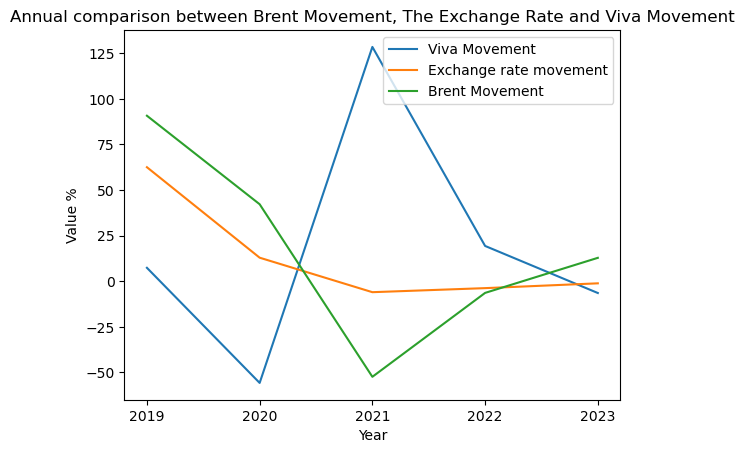

In [39]:


# Plot the line graph
ax = fuel_df1.plot(x='Year', y=['Viva Movement', 'Exchange rate movement', 'Brent Movement'], kind='line')

ax.set_xticks(fuel_df1['Year'])
ax.set_xticklabels(fuel_df1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Brent Movement, The Exchange Rate and Viva Movement')

# Show the plot
plt.show()